In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [2]:
with open("sign_mnist_train.csv") as f:
    content = f.readlines()
    
with open("sign_mnist_test.csv") as f_test:
    content_test = f_test.readlines()

In [3]:
lines = np.array(content)
num_of_instances = lines.size
num_of_instances

lines_test = np.array(content_test)
num_of_instances_test = lines_test.size
num_of_instances_test

7173

In [4]:
class Process:
    
    def __init__(self,line):
        self.line = line 
    
    def split(self):
        return self.line.split(",")
    
    def length(self,a):
        self.a = a
        return len(self.a)
    
    def vec(self,a,l):
        self.a = a
        self.l = l
        b = self.a[1:l]
        return b
    
    def intvec(self,vec):
        self.vec = vec
        a = [int(i) for i in self.vec]
        return a
    
    def reshape(self,b):
        self.b = b
        q = np.array(self.b).reshape(28,28)
        return q
        
        
    

In [5]:
def full_process(line):
    p = Process(line)
    splitted = p.split()
    label = splitted[0]
    length = p.length(splitted)
    vector= p.vec(splitted,length)
    integer_vector = p.intvec(vector)
    final = p.reshape(integer_vector)
    return final,label

In [6]:
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(1,num_of_instances):
    example = lines[i]
    q,label=full_process(example)
    X_train.append(q)
    y_train.append(int(label))

for i in range(1,num_of_instances_test):
    example_test = lines_test[i]
    q_test,label_test=full_process(example_test)
    X_test.append(q_test)
    y_test.append(int(label_test))
    

In [7]:
X_train = np.array(X_train).reshape(-1,28,28)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1,28,28)
y_test = np.array(y_test)

In [8]:
y_train_oh = to_categorical(y_train,num_classes=25)
y_test_oh = to_categorical(y_test,num_classes=25)

In [9]:
X_train = X_train/ 255
X_test = X_test/ 255

In [10]:
X_train = X_train.reshape(27455,28,28,1)

In [11]:
X_test = X_test.reshape(7172,28,28,1)

In [12]:
X_train.shape

(27455, 28, 28, 1)

In [13]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(25,activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = "adam",metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [16]:
history = model.fit(X_train,y_train_oh,epochs=30,validation_data=(X_test,y_test_oh),callbacks=[early_stop])

Train on 27455 samples, validate on 7172 samples
Epoch 1/30
27455/27455 [==============================] - 51s 2ms/sample - loss: 0.7651 - accuracy: 0.7983 - val_loss: 0.5427 - val_accuracy: 0.8402
Epoch 2/30
27455/27455 [==============================] - 44s 2ms/sample - loss: 0.0701 - accuracy: 0.9867 - val_loss: 0.5055 - val_accuracy: 0.8738
Epoch 3/30
27455/27455 [==============================] - 40s 1ms/sample - loss: 0.0271 - accuracy: 0.9952 - val_loss: 0.5154 - val_accuracy: 0.8763
Epoch 4/30
27455/27455 [==============================] - 35s 1ms/sample - loss: 0.0151 - accuracy: 0.9971 - val_loss: 0.5906 - val_accuracy: 0.8805
Epoch 5/30
27455/27455 [==============================] - 43s 2ms/sample - loss: 0.0096 - accuracy: 0.9981 - val_loss: 0.5413 - val_accuracy: 0.8788


In [17]:
import pandas as pd

In [18]:
 metrics= pd.DataFrame(model.history.history)

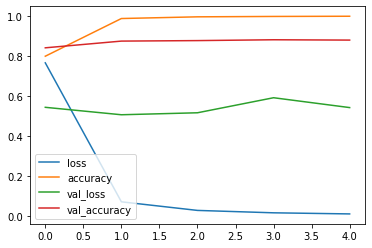

In [19]:
metrics.plot()

In [20]:
model.save('model_one.h5')

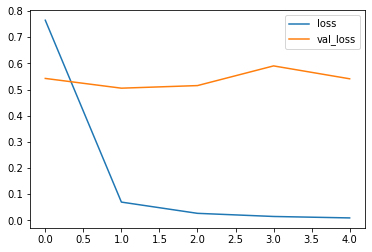

In [21]:
metrics[['loss','val_loss']].plot()

In [22]:
model2 = Sequential()

model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))

model2.add(Flatten())

model2.add(Dense(256,activation='relu'))

model2.add(Dense(25,activation='softmax'))

model2.compile(loss = "categorical_crossentropy", optimizer = "adam",metrics=['accuracy'])

In [23]:
history2= model2.fit(X_train,y_train_oh,epochs=20,validation_data=[X_test,y_test_oh],callbacks=[early_stop])

Train on 27455 samples, validate on 7172 samples
Epoch 1/20
27455/27455 [==============================] - 65s 2ms/sample - loss: 1.3729 - accuracy: 0.5733 - val_loss: 0.3870 - val_accuracy: 0.8940
Epoch 2/20
27455/27455 [==============================] - 56s 2ms/sample - loss: 0.2570 - accuracy: 0.9150 - val_loss: 0.2016 - val_accuracy: 0.9453
Epoch 3/20
27455/27455 [==============================] - 55s 2ms/sample - loss: 0.1192 - accuracy: 0.9606 - val_loss: 0.1886 - val_accuracy: 0.9544
Epoch 4/20
27455/27455 [==============================] - 60s 2ms/sample - loss: 0.0707 - accuracy: 0.9781 - val_loss: 0.1934 - val_accuracy: 0.9529
Epoch 5/20
27455/27455 [==============================] - 62s 2ms/sample - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.1670 - val_accuracy: 0.9677
Epoch 6/20
27455/27455 [==============================] - 54s 2ms/sample - loss: 0.0396 - accuracy: 0.9863 - val_loss: 0.2343 - val_accuracy: 0.9509
Epoch 7/20
27455/27455 [==============================] -

In [24]:
 metrics2= pd.DataFrame(model2.history.history)

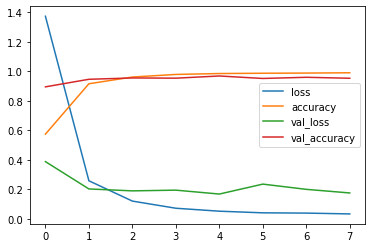

In [25]:
metrics2.plot()

Lets add another convolutional layer

In [26]:
model2.save('model_two.h5')

In [27]:
model3 = Sequential()

model3.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.5))

model3.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.5))

model3.add(Flatten())

model3.add(Dense(256,activation='relu'))

model3.add(Dense(25,activation='softmax'))

model3.compile(loss = "categorical_crossentropy", optimizer = "rmsprop",metrics=['accuracy'])

In [28]:
history3= model3.fit(X_train,y_train_oh,epochs=20,validation_data=[X_test,y_test_oh],callbacks=[early_stop])

Train on 27455 samples, validate on 7172 samples
Epoch 1/20
27455/27455 [==============================] - 61s 2ms/sample - loss: 1.2637 - accuracy: 0.6064 - val_loss: 0.5897 - val_accuracy: 0.7916
Epoch 2/20
27455/27455 [==============================] - 56s 2ms/sample - loss: 0.2349 - accuracy: 0.9206 - val_loss: 0.2225 - val_accuracy: 0.9435
Epoch 3/20
27455/27455 [==============================] - 59s 2ms/sample - loss: 0.1063 - accuracy: 0.9649 - val_loss: 0.2126 - val_accuracy: 0.9472
Epoch 4/20
27455/27455 [==============================] - 60s 2ms/sample - loss: 0.0678 - accuracy: 0.9778 - val_loss: 0.1790 - val_accuracy: 0.9519
Epoch 5/20
27455/27455 [==============================] - 61s 2ms/sample - loss: 0.0507 - accuracy: 0.9830 - val_loss: 0.2039 - val_accuracy: 0.9512
Epoch 6/20
27455/27455 [==============================] - 62s 2ms/sample - loss: 0.0381 - accuracy: 0.9867 - val_loss: 0.2087 - val_accuracy: 0.9580
Epoch 7/20
27455/27455 [==============================] -

In [29]:
model3.save("model_three.h5")

In [30]:
test_case= X_test[5].reshape(28,28)

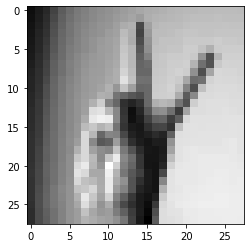

In [31]:
plt.imshow(test_case,cmap='gray')

In [32]:
model2.predict_classes(X_test)[5]

21

In [33]:
y_test[5]

21

In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [35]:
model.evaluate(X_test,y_test_oh)

7172/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5413348930072062, 0.87883437]

In [36]:
model2.evaluate(X_test,y_test_oh)

7172/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1743798420222733, 0.95231456]

In [37]:
model3.evaluate(X_test,y_test_oh)

7172/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1923819841587973, 0.96528167]